✅ Jumlah gambar terbaca: 153 dari 3 kelas
Data latih: 122
Data uji: 31

🎯 Akurasi Model Random Forest: 96.77%

=== Classification Report ===
              precision    recall  f1-score   support

 Daun_Nangka       1.00      0.91      0.95        11
  Daun_Sirih       1.00      1.00      1.00        12
      Nangka       0.89      1.00      0.94         8

    accuracy                           0.97        31
   macro avg       0.96      0.97      0.96        31
weighted avg       0.97      0.97      0.97        31



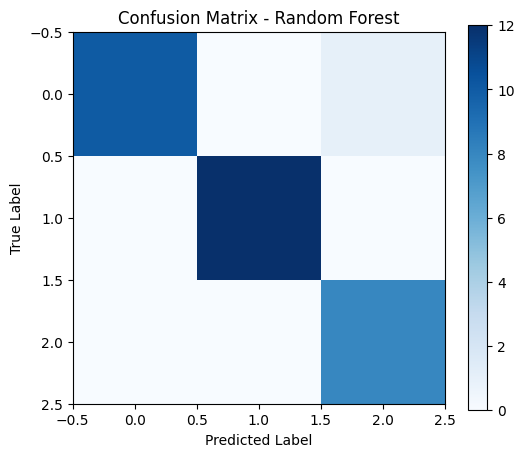


Contoh 5 hasil prediksi:
1. Prediksi: Daun_Sirih | Asli: Daun_Sirih
2. Prediksi: Daun_Sirih | Asli: Daun_Sirih
3. Prediksi: Daun_Sirih | Asli: Daun_Sirih
4. Prediksi: Nangka | Asli: Nangka
5. Prediksi: Daun_Nangka | Asli: Daun_Nangka


In [ ]:
# === Import Library ===
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# === Path ke dataset ===
data_dir = "dataset"

# === Mengecek apakah folder dataset ada ===
if not os.path.exists(data_dir):
    raise FileNotFoundError("⚠️ Folder 'dataset' tidak ditemukan. Pastikan folder tersebut ada di direktori proyek.")

# === Membaca gambar dan mengekstraksi fitur warna (histogram RGB) ===
labels = []
features = []

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path)
        if img is None:
            continue

        # Resize gambar agar seragam
        img = cv2.resize(img, (128, 128))

        # Ekstraksi fitur warna: histogram RGB (8x8x8 bin)
        hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8],
                            [0, 256, 0, 256, 0, 256])
        hist = cv2.normalize(hist, hist).flatten()

        features.append(hist)
        labels.append(folder)

print(f"✅ Jumlah gambar terbaca: {len(features)} dari {len(set(labels))} kelas")

# === Ubah ke format NumPy array ===
X = np.array(features)
y = np.array(labels)

# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data latih:", len(X_train))
print("Data uji:", len(X_test))

# === Inisialisasi dan latih model Random Forest ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# === Prediksi ===
y_pred = rf.predict(X_test)

# === Evaluasi ===
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Akurasi Model Random Forest: {acc * 100:.2f}%\n")

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()

# === Tampilkan hasil prediksi contoh ===
print("\nContoh 5 hasil prediksi:")
for i in range(min(5, len(y_pred))):
    print(f"{i+1}. Prediksi: {y_pred[i]} | Asli: {y_test[i]}")

